In [1]:
import tensorflow as tf
from Model.Model import SegmentationModel
import Scripts.DataPrepering as dp
from IPython.display import clear_output
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.image import imread 
import numpy as np
import pydot
import matplotlib.pyplot as plt

In [ ]:
print("Import complete")
print("Generating Model")

model = SegmentationModel.generateModel()

In [ ]:
model.summary()

In [ ]:
# tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
print("Compiling model")
print("==============")

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
print("Loading and preparing data")
print("==============")

### Preprocessing

In [ ]:
# dp.resizeImagesInFolder("Data/images", 128, 128)
# dp.resizeImagesInFolder("Data/labels", 128, 128)

In [ ]:
X = dp.loadImages("Data/images")
Y = dp.loadMasks("Data/labels")

In [ ]:
X_filtred = []
Y_filtred = []
for i in range(len(X)):
    if X[i].shape == (128,128,3):
        X_filtred.append(X[i])    
        Y_filtred.append(Y[i])   
X = X_filtred
Y = Y_filtred



### Seting type and fixing values

In [ ]:
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

### Augumenttion

In [ ]:
import random
import skimage

In [ ]:
from scipy import ndimage, misc
### Rotate by random 20% of image
X_augumated = []
Y_augumated = []
random_index = random.sample([x for x in range(X.shape[0])], int(X.shape[0]*0.35))
for index in random_index:
    degree = random.randint(1,180)
    X_augumated.append(ndimage.rotate(X[index], degree, reshape=False))
    Y_augumated.append(ndimage.rotate(Y[index], degree, reshape=False))
    
X_augumated = np.array(X_augumated)
Y_augumated = np.array(Y_augumated)

X = np.concatenate((X, X_augumated))
Y = np.concatenate((Y, Y_augumated))

In [ ]:
from scipy import ndimage, misc
### Horizontal flip 20% of image
X_augumated = []
Y_augumated = []
random_index = random.sample([x for x in range(X.shape[0])], int(X.shape[0]*0.35))
for index in random_index:
    degree = random.randint(1,180)
    X_augumated.append(X[index][:, ::-1])
    Y_augumated.append(Y[index][:, ::-1])
    
X_augumated = np.array(X_augumated)
Y_augumated = np.array(Y_augumated)

X = np.concatenate((X, X_augumated))
Y = np.concatenate((Y, Y_augumated))

In [ ]:
from scipy import ndimage, misc
### Horizontal flip 20% of image
X_augumated = []
Y_augumated = []
random_index = random.sample([x for x in range(X.shape[0])], int(X.shape[0]*0.35))
for index in random_index:
    degree = random.randint(1,180)
    X_augumated.append(X[index][::-1, :])
    Y_augumated.append(Y[index][::-1, :])
    
X_augumated = np.array(X_augumated)
Y_augumated = np.array(Y_augumated)

X = np.concatenate((X, X_augumated))
Y = np.concatenate((Y, Y_augumated))

### Normalizing and fixing values in masks

In [ ]:
Y = Y>0
Y = Y.astype(int)

In [ ]:
X, Y = dp.normalize(X, Y)



In [ ]:
### TEMP
X = X[:50]
Y = Y[:50]

### Training model

In [ ]:
print("Train set:\n X:"+str(X.shape)+" y:"+str(Y.shape))

In [ ]:
TRAIN_LENGTH = X.shape[0]
EPOCHS = 100
BATCH_SIZE = 16
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
model_history = model.fit(X, Y, batch_size=BATCH_SIZE,
                          epochs=EPOCHS)
                        
model.save("model")

### Evaluation

In [ ]:
plt.plot(model_history.history["loss"], color="red")
plt.title('model loss function')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##Predictions
model = tf.keras.models.load_model('model')

In [ ]:
INDEX = 4
test = X[INDEX]
test = np.reshape(test, (1,128,128,3))
predict = model.predict(test)

dp.display([X[INDEX], Y[INDEX],dp.create_mask(predict)])

In [ ]:
INDEX = 67
test = X[INDEX]
test = np.reshape(test, (1,128,128,3))
predict = model.predict(test)

dp.display([X[INDEX], Y[INDEX],dp.create_mask(predict)])

In [ ]:
INDEX = 45
test = X[INDEX]
test = np.reshape(test, (1,128,128,3))
predict = model.predict(test)

dp.display([X[INDEX], Y[INDEX],dp.create_mask(predict)])

In [ ]:
INDEX = 33
test = X[INDEX]
test = np.reshape(test, (1,128,128,3))
predict = model.predict(test)

dp.display([X[INDEX], Y[INDEX],dp.create_mask(predict)])

In [ ]:
INDEX = 12
test = X[INDEX]
test = np.reshape(test, (1,128,128,3))
predict = model.predict(test)

dp.display([X[INDEX], Y[INDEX],dp.create_mask(predict)])

In [ ]:
model.save("model_100e")

### Evaluation on test set

In [2]:
import keras

In [39]:
model =  keras.models.load_model("model_with_validation_100e_90_70")

In [40]:
dp.resizeImagesInFolder("Data/test_image", 128, 128)
dp.resizeImagesInFolder("Data/test_label", 128, 128)

In [41]:
X_test = dp.loadImages("Data/test_image")
Y_test = dp.loadMasks("Data/test_label")

In [42]:
X_filtred = []
Y_filtred = []
for i in range(len(X_test)):
    if X_test[i].shape == (128,128,3):
        X_filtred.append(X_test[i])    
        Y_filtred.append(Y_test[i])   
X_test = X_filtred
Y_test = Y_filtred

In [43]:
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

In [44]:
Y_test = Y_test>0
Y_test = Y_test.astype(int)

In [45]:
X_test, Y_test = dp.normalize(X_test, Y_test)

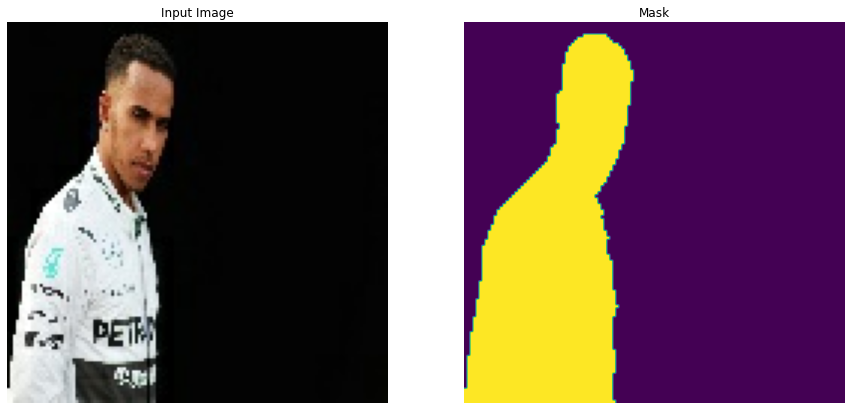

In [46]:
dp.display([X_test[0], Y_test[0]])

In [47]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 997us/step - loss: 0.7031 - accuracy: 0.0000e+00


[0.7030566930770874, 0.0]

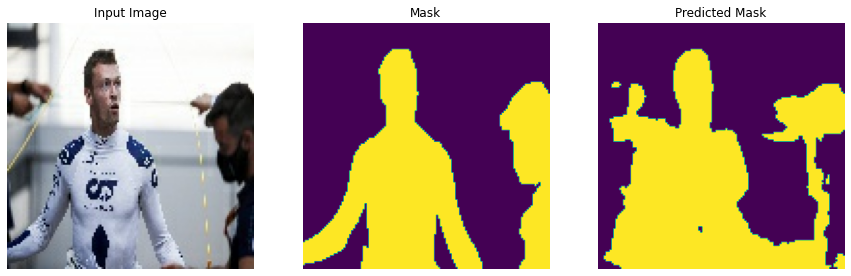

In [54]:
INDEX = 9
test = X_test[INDEX]
test = np.reshape(test, (1,128,128,3))
predict = model.predict(test)

dp.display([X_test[INDEX], Y_test[INDEX],dp.create_mask(predict)])